# <center> <font color ="RED" > OLYMPICS DATA ANALYSIS </font><center>

# <font color ="Green">Importing Neccesary Libraries </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as plty
import seaborn as sns
import os

# <font color = 'Green'>Loading & Performing EDA on  The Dataset

In [2]:
os.getcwd()

'C:\\Users\\raghu\\Documents\\Juypter Notebook\\Olympics Data Analysis'

In [41]:
fd = pd.read_csv("Summer-Olympic-medals-1976-to-2008.csv", encoding ='latin1')

## 1. Dimension of Dataset

In [4]:
fd.shape

(15433, 11)

## 2.How Does Data Look Like 

In [5]:
fd.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [6]:
fd.tail()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold
15432,Beijing,2008.0,Wrestling,Wrestling Gre-R,96 - 120kg,"LOPEZ, Mijain",Men,CUB,Cuba,M,Gold


In [7]:
fd.sample(5)

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
8520,Atlanta,1996.0,Football,Football,football,"SIMEONE, Diego",Men,ARG,Argentina,M,Silver
11089,Sydney,2000.0,Shooting,Shooting,10m air pistol (40 shots),"TAO, Luna",Women,CHN,China,W,Gold
3704,Los Angeles,1984.0,Handball,Handball,handball,"MLADENOVIC, Dragan",Men,YUG,Yugoslavia,M,Gold
15188,Beijing,2008.0,Taekwondo,Taekwondo,58 - 68 kg,"SUNG, Yu-Chi",Men,TPE,Taiwan,M,Bronze
10345,Sydney,2000.0,Fencing,Fencing,sabre team,"SEGUIN, Cedric",Men,FRA,France,M,Silver


## 3.What are the Data Types of columns

In [8]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


## 5.How Dataset looks like mathematical 

In [9]:
fd.describe()

,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


## 6.Lets Look any columns we can drop

In [10]:
print(fd.Gender.unique())
print(fd.Event_gender.unique())

['Women' 'Men' nan]
['W' 'M' 'X' nan]


In [11]:
fd = fd.drop('Event_gender',axis = 1)
fd = fd.drop('Country_Code',axis = 1)

In [12]:
fd.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,East Germany,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,Soviet Union,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,United States,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,Italy,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,United States,Bronze


## 6.Any Missing Values in Dataset and Dropping Them

In [13]:
fd.isnull().sum()

City          117
Year          117
Sport         117
Discipline    117
Event         117
Athlete       117
Gender        117
Country       117
Medal         117
dtype: int64

In [14]:
fd = fd.dropna(how = 'all')
fd = fd.astype({'Year' :'int'})
fd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        15316 non-null  object
 1   Year        15316 non-null  int32 
 2   Sport       15316 non-null  object
 3   Discipline  15316 non-null  object
 4   Event       15316 non-null  object
 5   Athlete     15316 non-null  object
 6   Gender      15316 non-null  object
 7   Country     15316 non-null  object
 8   Medal       15316 non-null  object
dtypes: int32(1), object(8)
memory usage: 1.1+ MB


In [15]:
fd.isnull().sum()

City          0
Year          0
Sport         0
Discipline    0
Event         0
Athlete       0
Gender        0
Country       0
Medal         0
dtype: int64

# <font color = 'Green'>Exploratory Data Analysis </font>

# Q1. Which city hosted maximum number of olympics

In [16]:
fd.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,East Germany,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,Soviet Union,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,United States,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,Italy,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,United States,Bronze


In [17]:
fd1 = fd[['City','Year']]
print(fd1['City'].unique())
print(fd1['Year'].unique())

['Montreal' 'Moscow' 'Los Angeles' 'Seoul' 'Barcelona' 'Atlanta' 'Sydney'
 'Athens' 'Beijing']
[1976 1980 1984 1988 1992 1996 2000 2004 2008]


In [18]:
fd1 = fd1.drop_duplicates('Year')
fd1

,City,Year
0,Montreal,1976
1422,Moscow,1980
2809,Los Angeles,1984
4268,Seoul,1988
5814,Barcelona,1992
7519,Atlanta,1996
9378,Sydney,2000
11393,Athens,2004
13391,Beijing,2008


### It seems like, since 1976 no city has hosteed Olympics twice.

# Q2. Which city hosted most events.


In [19]:
fd2 = fd['City'].value_counts()


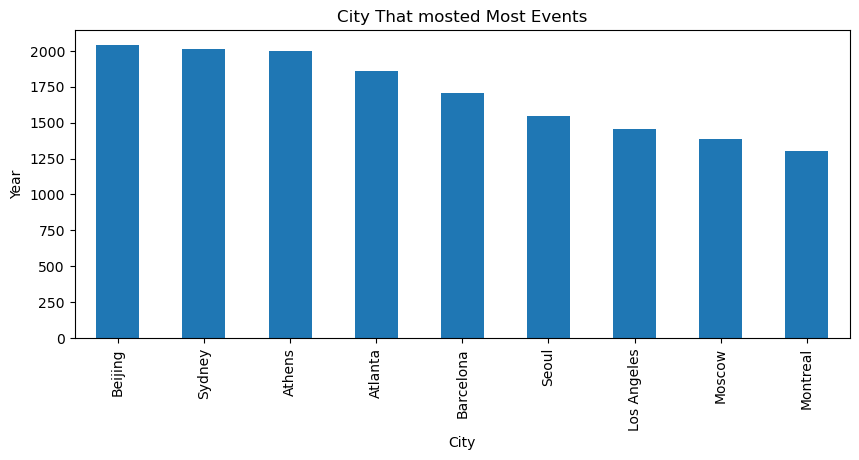

In [20]:
plt.figure(figsize=(10,4))
fd2.plot(x = 'City', kind = 'bar')
plt.xlabel('City')
plt.ylabel('Year')
plt.title('City That mosted Most Events')
plt.show()

### Beijing has the hosted the biggest Olympics since 1976 till 2008. Followed by Sydney and Athens..

# Q3.Understanding Events 

In [21]:
fd.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,East Germany,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,Soviet Union,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,United States,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,Italy,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,United States,Bronze


In [22]:
fd3 = fd[['Sport','Discipline','Event']].drop_duplicates()
print('Total Number of Unique Events :',len(fd3))

Total Number of Unique Events : 334


## Sport With most Events

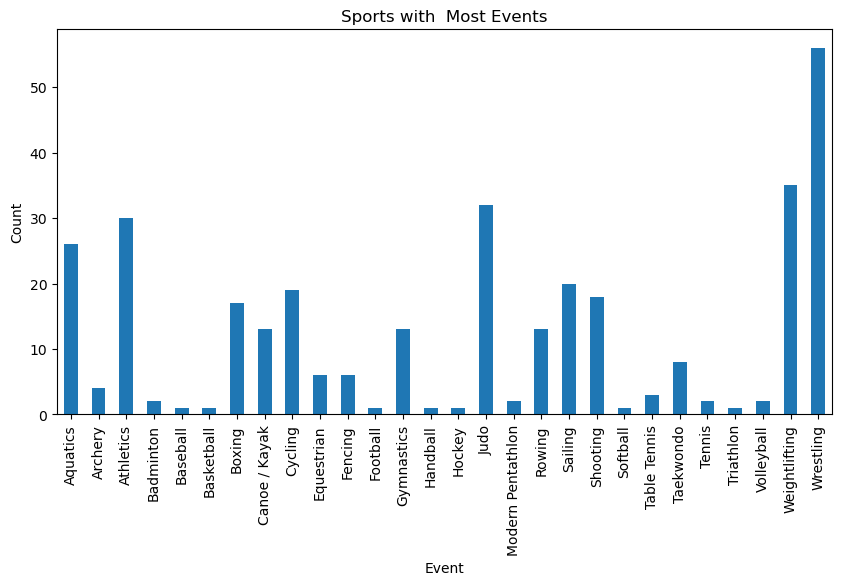

In [23]:
fd3 = fd3.groupby(['Sport'])['Sport'].size()
plt.figure(figsize = (10,5))
fd3.plot.bar(x = 'Sport')
plt.xlabel('Event')
plt.ylabel('Count')
plt.title('Sports with  Most Events')
plt.show()


## Sports with most events are Wrestling, Weightlifting and Judo. Total number of  unique events are held : 334

# Q4.Which Athlete has win most medal from given period ?

In [24]:
fd4 = fd.groupby(['Athlete'])['Athlete'].count().reset_index(name = 'Count').sort_values(ascending = False,by = ['Count'])
fd4 = fd4[:10]

<Figure size 1000x400 with 0 Axes>

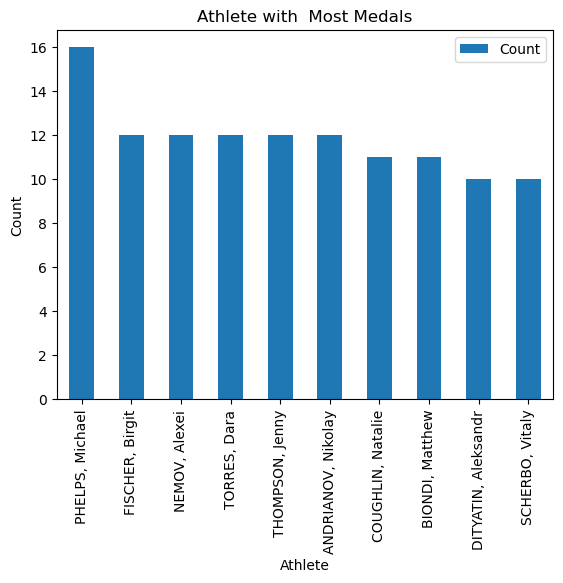

In [25]:
plt.figure(figsize= (10,4))
fd4.plot.bar(x = 'Athlete', y = 'Count')
plt.xlabel('Athlete')
plt.ylabel('Count')
plt.title('Athlete with  Most Medals')
plt.show()

## So Michael Phelps won 16 mdeal durin 1976 to 2008. Clearly mindblowing record !!!

# Q5.Which country has win most medal and how many in each year?

In [26]:
fd.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,East Germany,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,Soviet Union,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,United States,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,Italy,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,United States,Bronze


In [27]:
fd5 = fd[['Year','Country','Medal']]
fd5 = fd5.groupby(['Year','Country','Medal'])['Country'].count().reset_index(name = 'Count')
fd5['Medal'] = pd.Categorical(fd5['Medal'], categories=['Gold', 'Silver', 'Bronze'], ordered=True)
fd5 = fd5.pivot( index = ['Year','Country'], columns =
['Medal'], values = ['Count']).reset_index()
fd5 = fd5.replace(np.nan, 0)
fd5['Sum'] = fd5['Count', 'Bronze'] + fd5['Count','Gold'] + fd5['Count','Silver']
fd5 = fd5.sort_values(ascending = [True, False],by =
['Year','Sum'])
df = fd5
fd5.columns = fd5.columns.droplevel(0)
fd5.columns = ['Year', 'Country', 'Gold', 'Silver','Bronze', 'Sum']
print(fd5.Country.unique())

['Soviet Union' 'East Germany' 'United States' 'West Germany' 'Poland'
 'Hungary' 'Romania' 'Japan' 'Bulgaria' 'United Kingdom' 'Italy'
 'New Zealand' 'Australia' 'Cuba' 'Canada' 'France' 'Yugoslavia'
 'Korea, South' 'Pakistan' 'Czechoslovakia' 'Netherlands' 'Sweden'
 'Switzerland' 'Belgium' 'Denmark' 'Finland' 'Norway' 'Spain' 'Brazil'
 'Iran' 'Jamaica' 'Korea, North' 'Mexico' 'Portugal' 'Austria' 'Bermuda*'
 'Mongolia' 'Puerto Rico*' 'Thailand' 'Trinidad and Tobago' 'Venezuela'
 'India' 'Zimbabwe' 'Greece' 'Ethiopia' 'Ireland' 'Tanzania' 'Guyana'
 'Lebanon' 'Uganda' 'China' 'Nigeria' 'Kenya' 'Turkey' 'Algeria' 'Morocco'
 'Cameroon' 'Colombia' "Cote d'Ivoire" 'Dominican Republic' 'Egypt'
 'Iceland' 'Peru' 'Syria' 'Taiwan' 'Zambia' 'Argentina' 'Indonesia'
 'Chile' 'Costa Rica' 'Djibouti' 'Netherlands Antilles*' 'Philippines'
 'Senegal' 'Suriname' 'Virgin Islands*' 'Unified team' 'Germany' 'Croatia'
 'Ghana' 'Lithuania' 'Slovenia' 'Estonia'
 'Independent Olympic Participants (1992)' 'La

<Figure size 1000x400 with 0 Axes>

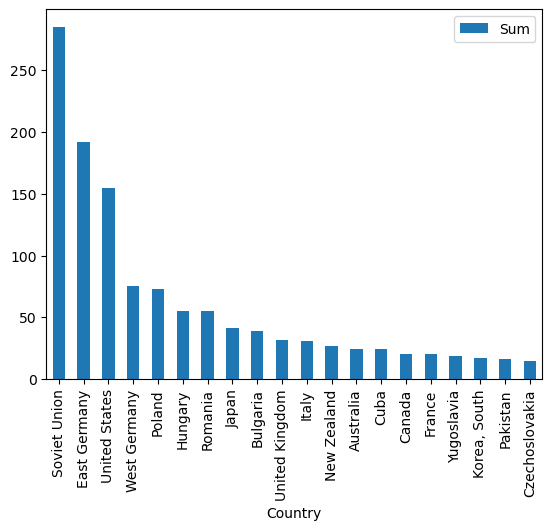

In [28]:
df = df[:20]
plt.figure(figsize = (10,4))
df.plot.bar(x = 'Country', y = 'Sum')
plt.show()

## Sovient Union is the Country with Most number of medals Domating the olympics

# Q6. Which Country Had Dominated in Any Particular Sport ?

In [29]:
fd6 = fd.groupby(['Sport','Country'])['Country'].count().reset_index(name = 'Count').sort_values(ascending = [True,False],by = ['Sport','Count'])
fd6.Sport.unique()



array(['Aquatics', 'Archery', 'Athletics', 'Badminton', 'Baseball',
       'Basketball', 'Boxing', 'Canoe / Kayak', 'Cycling', 'Equestrian',
       'Fencing', 'Football', 'Gymnastics', 'Handball', 'Hockey', 'Judo',
       'Modern Pentathlon', 'Rowing', 'Sailing', 'Shooting', 'Softball',
       'Table Tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Volleyball',
       'Weightlifting', 'Wrestling'], dtype=object)

In [30]:
try:
    inp = input('Select Sport From Above List')
except:
    print('Interrupted')
temp = fd6[fd6['Sport'] == inp].head()
print(temp)

Select Sport From Above List Fencing


       Sport       Country  Count
338  Fencing        France    115
341  Fencing         Italy    110
340  Fencing       Hungary     59
347  Fencing  Soviet Union     55
354  Fencing  West Germany     47


## So We now Created An interactive way to see Which Country is Dominated in Particular sport

# Q7.Has any athlete changed his or her Event or Discipline or sport and still win the medal?

In [34]:
fd.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,East Germany,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,Soviet Union,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,United States,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,Italy,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,United States,Bronze


In [43]:
fd7 = fd[['Athlete','Sport']].drop_duplicates()
temp = fd7.groupby(by = ['Athlete'])
for k,v in temp:
    if len(v['Sport'].tolist()) >1:
       print(k,v['Sport'].tolist())


('BELOVA, Irina',) ['Athletics', 'Gymnastics']
('CHEN, Jing',) ['Table Tennis', 'Volleyball']
('DIMITROV, Stefan',) ['Volleyball', 'Weightlifting']
('GAVRILOV, Yuri',) ['Football', 'Handball']
('GONZALEZ, Raul',) ['Athletics', 'Handball']
('KOLESNIKOV, Nikolai',) ['Athletics', 'Weightlifting']
('KOVACS, Istvan',) ['Wrestling', 'Boxing']
('KOVALENKO, Alexandre',) ['Athletics', 'Aquatics']
('KUZNETSOV, Mikhail',) ['Rowing', 'Canoe / Kayak']
('KUZNETSOV, Nikolai',) ['Rowing', 'Cycling']
('LEE, Eun Kyung',) ['Archery', 'Hockey']
('LI, Na',) ['Aquatics', 'Fencing']
('LI, Ting',) ['Aquatics', 'Tennis']
('OVCHINNIKOVA, Elena',) ['Volleyball', 'Aquatics']
('ROMERO, Rebecca',) ['Rowing', 'Cycling']
('THOMPSON, Richard',) ['Baseball', 'Athletics']
('TOMA, Sanda',) ['Rowing', 'Canoe / Kayak']
('WANG, Liping',) ['Football', 'Athletics']
('WELLS, Matthew',) ['Hockey', 'Rowing']
('YANG, Wei',) ['Badminton', 'Gymnastics']
('YOUNG, Tim',) ['Rowing', 'Baseball']


So there has been quite a few player who has changed the sport and still won a medal, Bow to them !!!!!

# Q.8 Which Country Had Dominated in Any Particular Sport ? Elaborate the result and dive into detials.(Pick any 5 country for this)

In [63]:
fd8 = fd5[['Year', 'Country','Sum']].groupby(['Year']).apply(lambda x : x.nlargest(5,'Sum'))
fd8 = fd8.pivot( index = ['Year'], columns = ['Country'], values = ['Sum']).reset_index()
fd8.columns = fd8.columns.droplevel(0)

fd8 = fd8.rename(columns={ fd8.columns[0]: "Year"})
fd8
temp = fd5.where(fd6.Country.isin(fd5.columns)).dropna()[["Year", "Country", "Sum"]]

In [65]:
fd8

Country,Year,Australia,Bulgaria,Canada,China,Cuba,East Germany,Germany,Hungary,Italy,"Korea, South",Poland,Romania,Russia,Soviet Union,Unified team,United States,West Germany,Yugoslavia
0,1976,NaN,NaN,NaN,NaN,NaN,192.0,NaN,NaN,NaN,NaN,73.0,NaN,NaN,285.0,NaN,155.0,75.0,NaN
1,1980,NaN,94.0,NaN,NaN,NaN,260.0,NaN,61.0,NaN,NaN,NaN,72.0,NaN,442.0,NaN,NaN,NaN,NaN
2,1984,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,NaN,NaN,NaN,333.0,157.0,87.0
3,1988,NaN,NaN,NaN,NaN,NaN,174.0,NaN,NaN,NaN,77.0,NaN,NaN,NaN,294.0,NaN,193.0,113.0,NaN
4,1992,NaN,NaN,NaN,83.0,71.0,NaN,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223.0,224.0,NaN,NaN
5,1996,132.0,NaN,NaN,110.0,NaN,NaN,124.0,NaN,NaN,NaN,NaN,NaN,115.0,NaN,NaN,260.0,NaN,NaN
6,2000,183.0,NaN,NaN,79.0,NaN,NaN,119.0,NaN,NaN,NaN,NaN,NaN,188.0,NaN,NaN,248.0,NaN,NaN
7,2004,157.0,NaN,NaN,NaN,NaN,NaN,149.0,NaN,102.0,NaN,NaN,NaN,192.0,NaN,NaN,264.0,NaN,NaN
8,2008,149.0,NaN,NaN,184.0,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,143.0,NaN,NaN,315.0,NaN,NaN


In [86]:
fd8 = fd5[['Year', 'Country','Sum']].groupby(['Year']).apply(lambda x : x.nlargest(5,'Sum'))['Country'].drop_duplicates()
temp = fd5.where(fd5.Country.isin(fd8)).dropna()[["Year","Country", "Sum"]]
temp = temp.pivot(index = ['Year'], columns = ['Country'], values = ['Sum']).reset_index()
temp.columns = temp.columns.droplevel(0)
temp = temp.rename(columns={ temp.columns[0]: "Year" })
fd8 = temp.replace(np.nan, 0)
fd9 =fd8
fd8

Country,Year,Australia,Bulgaria,Canada,China,Cuba,East Germany,Germany,Hungary,Italy,"Korea, South",Poland,Romania,Russia,Soviet Union,Unified team,United States,West Germany,Yugoslavia
0,1976.0,24.0,39.0,20.0,0.0,24.0,192.0,0.0,55.0,31.0,17.0,73.0,55.0,0.0,285.0,0.0,155.0,75.0,19.0
1,1980.0,12.0,94.0,0.0,0.0,20.0,260.0,0.0,61.0,37.0,0.0,50.0,72.0,0.0,442.0,0.0,0.0,0.0,57.0
2,1984.0,50.0,0.0,86.0,76.0,0.0,0.0,0.0,0.0,63.0,42.0,0.0,106.0,0.0,0.0,0.0,333.0,157.0,87.0
3,1988.0,34.0,41.0,21.0,53.0,0.0,174.0,0.0,44.0,29.0,77.0,21.0,51.0,0.0,294.0,0.0,193.0,113.0,63.0
4,1992.0,57.0,17.0,44.0,83.0,71.0,0.0,198.0,45.0,46.0,49.0,42.0,53.0,0.0,0.0,223.0,224.0,0.0,0.0
5,1996.0,132.0,21.0,51.0,110.0,57.0,0.0,124.0,43.0,71.0,66.0,21.0,38.0,115.0,0.0,0.0,260.0,0.0,26.0
6,2000.0,183.0,13.0,31.0,79.0,69.0,0.0,119.0,53.0,65.0,73.0,24.0,46.0,188.0,0.0,0.0,248.0,0.0,26.0
7,2004.0,157.0,17.0,17.0,94.0,61.0,0.0,149.0,40.0,102.0,52.0,12.0,39.0,192.0,0.0,0.0,264.0,0.0,0.0
8,2008.0,149.0,5.0,34.0,184.0,47.0,0.0,101.0,27.0,42.0,78.0,20.0,22.0,143.0,0.0,0.0,315.0,0.0,0.0


So these are the top 5 countries in each olympic game.
Lets Combine Soviet Union + 
Unified Team +Russia and East Germany + West Germany + Germany.Also lets drop Yugoslavia, Poland, South Korea, Italy, Hungary, Cuba, Canada,
Bulgaria as they are only shown up once in top 5.

In [87]:
fd8.Germany = fd8.Germany + fd8['East Germany'] + fd8['West Germany']
fd8.Russia = fd8['Soviet Union'] + fd8.Russia + fd8['Unified team']
fd8 = fd8.drop(['Yugoslavia','Poland','Korea, South','Italy','Hungary','Cuba','Canada','Bulgaria','East Germany', 'West Germany', 'Soviet Union', 'Unified team'],
               axis= 1)
fd8 =fd8.set_index('Year')
fd8


Country,Australia,China,Germany,Romania,Russia,United States
Year,,,,,,
1976.0,24.0,0.0,267.0,55.0,285.0,155.0
1980.0,12.0,0.0,260.0,72.0,442.0,0.0
1984.0,50.0,76.0,157.0,106.0,0.0,333.0
1988.0,34.0,53.0,287.0,51.0,294.0,193.0
1992.0,57.0,83.0,198.0,53.0,223.0,224.0
1996.0,132.0,110.0,124.0,38.0,115.0,260.0
2000.0,183.0,79.0,119.0,46.0,188.0,248.0
2004.0,157.0,94.0,149.0,39.0,192.0,264.0
2008.0,149.0,184.0,101.0,22.0,143.0,315.0


In [92]:
fd9 =fd8
fd9.reset_index('Year')

Country,Year,Australia,China,Germany,Romania,Russia,United States
0,1976.0,24.0,0.0,267.0,55.0,285.0,155.0
1,1980.0,12.0,0.0,260.0,72.0,442.0,0.0
2,1984.0,50.0,76.0,157.0,106.0,0.0,333.0
3,1988.0,34.0,53.0,287.0,51.0,294.0,193.0
4,1992.0,57.0,83.0,198.0,53.0,223.0,224.0
5,1996.0,132.0,110.0,124.0,38.0,115.0,260.0
6,2000.0,183.0,79.0,119.0,46.0,188.0,248.0
7,2004.0,157.0,94.0,149.0,39.0,192.0,264.0
8,2008.0,149.0,184.0,101.0,22.0,143.0,315.0


C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


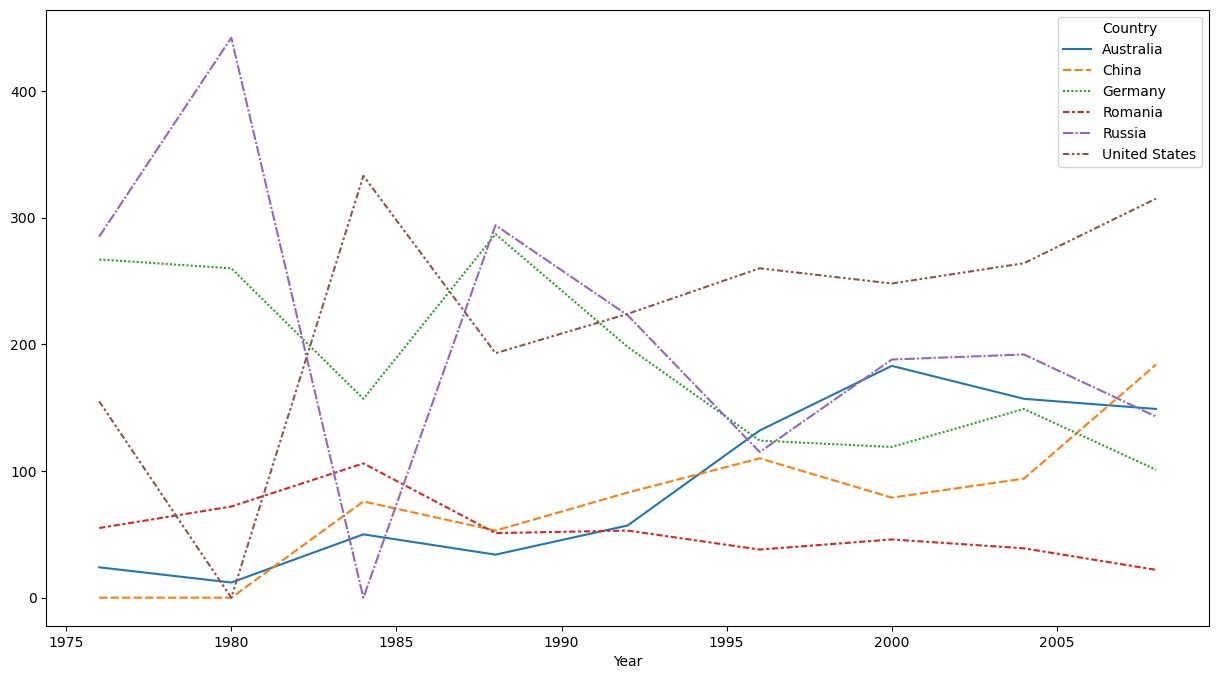

In [98]:
#Lets plot line graph For this
import seaborn as sns
plt.figure(figsize=(15,8))
sns.lineplot(data = fd9)
plt.show()